In [1]:
# Library import
#import chardet # 인코딩
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set Path

path_train = "/Users/gim-yulim/github/hit/electric_train.csv"
path_test = "/Users/gim-yulim/github/hit/electric_test.csv"

In [3]:
# Make DataFrame from CSV

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:
# Check the number of columns

print(f"Shape of train:", df_train.shape)
print(f"Shape of test:", df_test.shape)

Shape of train: (1048575, 17)
Shape of test: (1048575, 12)


In [5]:
# train과 test의 Unnamed: 0 index 컬럼 삭제

del df_train["Unnamed: 0"]
del df_test["Unnamed: 0"]

In [6]:
df_train.head()

,c_num,e_tm,e_hh24,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name,e_elec
0,4821,2021.1.1 1:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021.1.1 2:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021.1.1 3:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021.1.1 4:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021.1.1 5:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [7]:
df_test.head()

,c_num,e_tm,e_hh24,c_stn,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name
0,2385,2023-01-01 1:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1
1,2385,2023-01-01 2:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1
2,2385,2023-01-01 3:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1
3,2385,2023-01-01 4:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1
4,2385,2023-01-01 5:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1


In [8]:
# 공동주택 가구 수 "e_n" 중복 제거 값 확인
print(f"Unique values in e_n: {sorted(df_train['e_n'].unique())}")
print(f"Length of unique values in e_n: {len(df_train['e_n'].unique())}")
print(f"Columns in df_train: {df_train.columns}")
# set(df['e_n']) 2번



Unique values in e_n: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 41, 42, 43, 44, 45, 46, 49, 50, 52, 53, 57, 58, 62, 68, 70, 72, 73, 75, 76, 78, 81, 85, 87, 90, 101, 102, 126]
Length of unique values in e_n: 54
Columns in df_train: Index(['c_num', 'e_tm', 'e_hh24', 'e_n', 'c_stn', 'e_sum_qctr', 'e_sum_load',
       'e_n_mean_load', 'c_nph_ta', 'c_nph_hm', 'c_nph_ws_10m', 'c_nph_rn_60m',
       'c_nph_ta_chi', 'e_weekday', 'e_week_name', 'e_elec'],
      dtype='object')


In [9]:
print("* Information of Train Dataset")
print(f"격자넘버:", sorted(df_train['c_num'].unique())) # 5km * 5km 
print(f"지점번호:", sorted(df_train['c_stn'].unique())) # 측정위치
print(f"df_train의 격자넘버 개수: ",len(df_train['c_num'].unique()))
print(f"df_train의 지점번호 개수: ",len(df_train['c_stn'].unique()))
print("---------" * 15)

print("* Information of Test Dataset")
print(f"test_격자넘버:", sorted(df_test['c_num'].unique())) # 5km * 5km 
print(f"test_지점번호:", sorted(df_test['c_stn'].unique())) # 측정위치
print(f"df_test의 격자넘버 개수: ",len(df_test['c_num'].unique()))
print(f"df_test의 지점번호 개수: ",len(df_test['c_stn'].unique()))



* Information of Train Dataset
격자넘버: [4821, 5565, 5566, 5567, 8994, 9609, 9735, 9736, 9758, 9759, 9884, 9885, 10069, 10070, 10218, 10222, 10223, 10224, 10351, 10352, 10354, 10361, 10486, 10487, 10787, 10808, 10824, 10934, 10935, 10936, 10937, 10970, 10972, 10973, 10974, 10975, 10976, 11083, 11084, 11085, 11086, 11106, 11107, 11115, 11117, 11119, 11122, 11123]
지점번호: [155, 156, 159, 162, 165, 168, 184, 192, 261, 266, 294, 313, 330, 708, 710, 712, 713, 722, 774, 783, 788, 884, 904, 907, 908, 917, 938, 942, 950]
df_train의 격자넘버 개수:  48
df_train의 지점번호 개수:  29
---------------------------------------------------------------------------------------------------------------------------------------
* Information of Test Dataset
test_격자넘버: [2385, 4816, 4821, 5565, 5566, 5567, 8994, 9735, 9736, 9884, 9885, 10487, 10787, 10934, 10935, 10936, 10937, 11083, 11084, 11085, 11086, 11233, 11234, 11376, 12276, 13470, 13614, 13615, 13619, 14805, 16001, 16140, 16143, 16153, 16292, 16301, 16302, 16593, 16895, 

In [10]:
#'e_tm' 컬럼을 datetime으로 변환
df_test['e_tm'] = pd.to_datetime(df_test['e_tm'])



In [11]:
#'e_tm' 컬럼을 datetime으로 변환
df_train["e_tm"] = pd.to_datetime(df_train['e_tm'])


In [12]:
#'e_tm' 컬럼을 year, month, day, hour로 분리
df_test['year'] = df_test['e_tm'].dt.year
df_test['month'] = df_test['e_tm'].dt.month
df_test['day'] = df_test['e_tm'].dt.day
df_test['hour'] = df_test['e_tm'].dt.hour

In [13]:
#'e_tm' 컬럼을 year, month, day, hour로 분리
df_train['year'] = df_train['e_tm'].dt.year
df_train['month'] = df_train['e_tm'].dt.month
df_train['day'] = df_train['e_tm'].dt.day
df_train['hour'] = df_train['e_tm'].dt.hour

In [14]:
#year,month,day,hour로 불리한 후 원본 데이셋 삭제
df_train.drop(columns=['e_tm','e_hh24'], inplace=True)  # inplace=True로 설정하면 원본 데이터프임이 수정됩니다.



In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   c_num          1048575 non-null  int64  
 1   e_n            1048575 non-null  int64  
 2   c_stn          1048575 non-null  int64  
 3   e_sum_qctr     1048575 non-null  int64  
 4   e_sum_load     1048575 non-null  float64
 5   e_n_mean_load  1048575 non-null  float64
 6   c_nph_ta       1048575 non-null  float64
 7   c_nph_hm       1048575 non-null  float64
 8   c_nph_ws_10m   1048575 non-null  float64
 9   c_nph_rn_60m   1048575 non-null  float64
 10  c_nph_ta_chi   1048575 non-null  float64
 11  e_weekday      1048575 non-null  int64  
 12  e_week_name    1048575 non-null  int64  
 13  e_elec         1048575 non-null  float64
 14  year           1048575 non-null  int32  
 15  month          1048575 non-null  int32  
 16  day            1048575 non-null  int32  
 17  hour    

In [16]:
#year,month,day,hour로 불리한 후 원본 데이셋 삭제
df_test.drop(columns=['e_tm','e_hh24'], inplace=True)  # inplace=True로 설정하면 원본 데이터프레임이 수정됩니다.

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   c_num         1048575 non-null  int64  
 1   c_stn         1048575 non-null  int64  
 2   c_nph_ta      1048575 non-null  float64
 3   c_nph_hm      1048575 non-null  float64
 4   c_nph_ws_10m  1048575 non-null  float64
 5   c_nph_rn_60m  1048575 non-null  float64
 6   c_nph_ta_chi  1048575 non-null  float64
 7   e_weekday     1048575 non-null  int64  
 8   e_week_name   1048575 non-null  int64  
 9   year          1048575 non-null  int32  
 10  month         1048575 non-null  int32  
 11  day           1048575 non-null  int32  
 12  hour          1048575 non-null  int32  
dtypes: float64(5), int32(4), int64(4)
memory usage: 88.0 MB


In [18]:
# 상관관계 분석
correlation_matrix = df_test.corr()

print(correlation_matrix)



                 c_num     c_stn  c_nph_ta  c_nph_hm  c_nph_ws_10m  \
c_num         1.000000 -0.062335 -0.045895 -0.156602     -0.315045   
c_stn        -0.062335  1.000000  0.001726  0.033335     -0.055364   
c_nph_ta     -0.045895  0.001726  1.000000  0.297825     -0.016698   
c_nph_hm     -0.156602  0.033335  0.297825  1.000000     -0.120393   
c_nph_ws_10m -0.315045 -0.055364 -0.016698 -0.120393      1.000000   
c_nph_rn_60m  0.027689  0.008410  0.064522  0.123400      0.120077   
c_nph_ta_chi -0.056133  0.005861  0.953686  0.409440     -0.069616   
e_weekday    -0.000040  0.000011 -0.011564  0.041034     -0.001859   
e_week_name  -0.000021  0.000006 -0.023255  0.019263     -0.011533   
year         -0.000047  0.000013 -0.014541  0.009815     -0.006531   
month        -0.002265  0.000604  0.243501  0.191239     -0.026555   
day          -0.000226  0.000060 -0.040623  0.045746     -0.024381   
hour         -0.000005  0.000001  0.116657 -0.182694      0.069683   

              c_nph

In [19]:
# 상관관계 계산
correlation_matrix = df_train.corr()

# 'e_elec' 피처와의 상관관계만 확인
corr_with_e_elec = correlation_matrix['e_elec']

print(corr_with_e_elec)


c_num           -0.000104
e_n             -0.000389
c_stn           -0.000199
e_sum_qctr      -0.000439
e_sum_load       0.310752
e_n_mean_load   -0.000017
c_nph_ta         0.249398
c_nph_hm         0.123387
c_nph_ws_10m     0.009656
c_nph_rn_60m     0.024346
c_nph_ta_chi     0.242011
e_weekday        0.037302
e_week_name      0.052661
e_elec           1.000000
year             0.000059
month            0.046501
day             -0.009711
hour             0.576610
Name: e_elec, dtype: float64


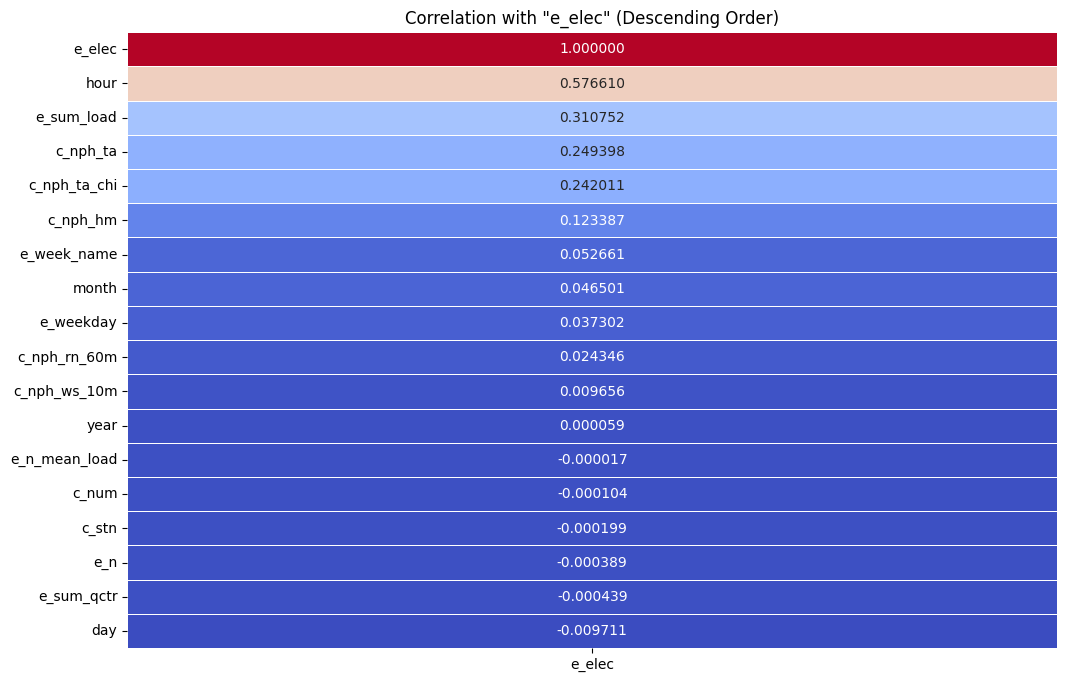

In [20]:
# 상관관계 계산
correlation_matrix = df_train.corr()

# 'e_elec' 피처와의 상관관계만 확인
corr_with_e_elec = correlation_matrix['e_elec']

# 상관관계를 내림차순으로 정렬
correlation_with_elec_sorted = corr_with_e_elec.sort_values(ascending=False)

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_elec_sorted.to_frame(), annot=True, cmap='coolwarm', fmt=".6f", linewidths=.5, cbar=False)
plt.title('Correlation with "e_elec" (Descending Order)')
plt.show()


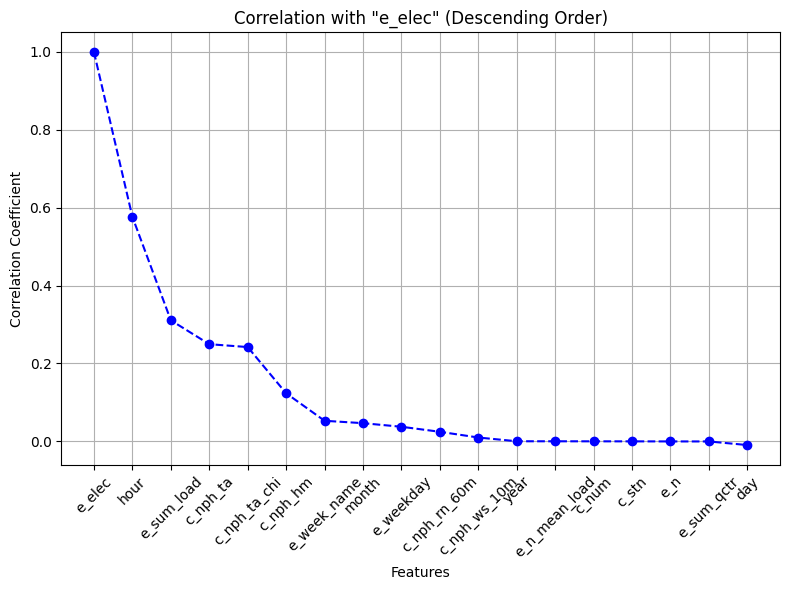

In [21]:
# 상관관계 계산
correlation_matrix = df_train.corr()

# 'e_elec' 피처와의 상관관계만 확인
corr_with_e_elec = correlation_matrix['e_elec']

# 상관관계를 내림차순으로 정렬
correlation_with_elec_sorted = corr_with_e_elec.sort_values(ascending=False)

# 상관관계를 데이터프레임으로 변환
correlation_df = correlation_with_elec_sorted.to_frame(name='Correlation with e_elec')

# 상관관계 매트릭스 시각화
plt.figure(figsize=(8, 6))
plt.plot(correlation_df, marker='o', linestyle='--', color='b')
plt.xticks(rotation=45)
plt.title('Correlation with "e_elec" (Descending Order)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

                  c_num       e_n     c_stn  e_sum_qctr  e_sum_load  \
c_num          1.000000  0.180455  0.337504    0.313651    0.315504   
e_n            0.180455  1.000000 -0.019518    0.859190    0.767529   
c_stn          0.337504 -0.019518  1.000000    0.120530    0.131903   
e_sum_qctr     0.313651  0.859190  0.120530    1.000000    0.890099   
e_sum_load     0.315504  0.767529  0.131903    0.890099    1.000000   
e_n_mean_load  0.327349 -0.214952  0.297109    0.178708    0.226292   
c_nph_ta      -0.047566 -0.005716  0.003272   -0.022570    0.050088   
c_nph_hm       0.047582  0.070921  0.054577    0.093229    0.129955   
c_nph_ws_10m  -0.026283  0.013228 -0.066780    0.014287    0.009996   
c_nph_rn_60m  -0.020928 -0.004635 -0.008770   -0.008345   -0.001096   
c_nph_ta_chi  -0.041097 -0.005115 -0.007412   -0.015458    0.058702   
e_weekday      0.000031 -0.000113  0.000104    0.000028    0.012127   
e_week_name    0.000176 -0.000146  0.000237    0.000157    0.017088   
e_elec

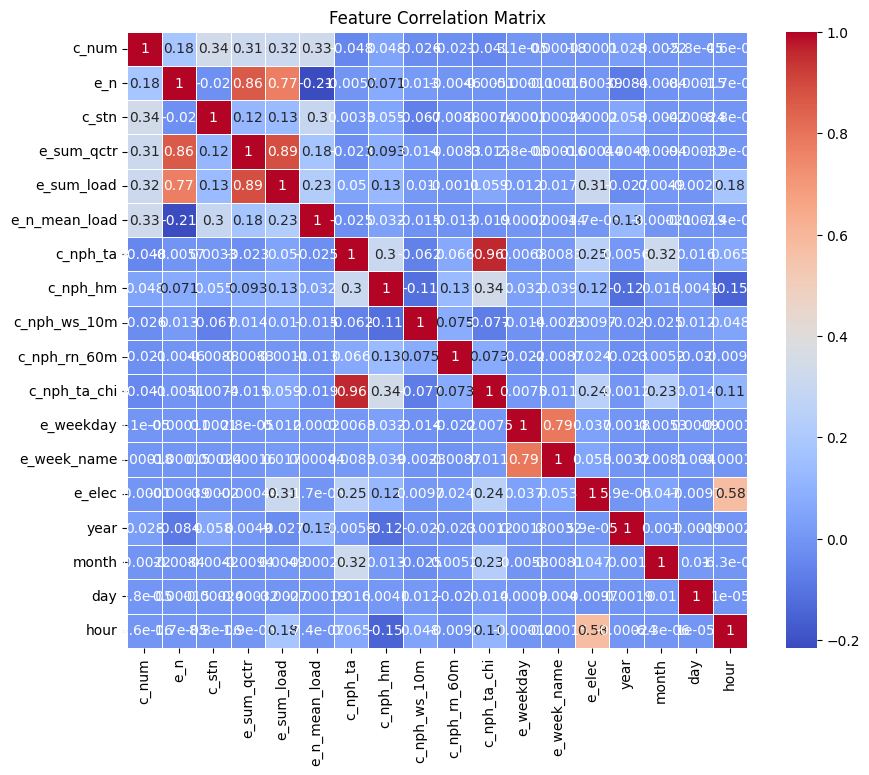

In [22]:
# 상관행렬 계산
correlation_matrix = df_train.corr()


# 상관행렬 출력
print(correlation_matrix)

# 상관행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   c_num          1048575 non-null  int64  
 1   e_n            1048575 non-null  int64  
 2   c_stn          1048575 non-null  int64  
 3   e_sum_qctr     1048575 non-null  int64  
 4   e_sum_load     1048575 non-null  float64
 5   e_n_mean_load  1048575 non-null  float64
 6   c_nph_ta       1048575 non-null  float64
 7   c_nph_hm       1048575 non-null  float64
 8   c_nph_ws_10m   1048575 non-null  float64
 9   c_nph_rn_60m   1048575 non-null  float64
 10  c_nph_ta_chi   1048575 non-null  float64
 11  e_weekday      1048575 non-null  int64  
 12  e_week_name    1048575 non-null  int64  
 13  e_elec         1048575 non-null  float64
 14  year           1048575 non-null  int32  
 15  month          1048575 non-null  int32  
 16  day            1048575 non-null  int32  
 17  hour    

In [24]:
df_train

,c_num,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name,e_elec,year,month,day,hour
0,4821,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1,1
1,4821,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1,2
2,4821,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1,3
3,4821,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1,4
4,4821,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11123,87,938,118100,23887.84,218.153104,28.2,87.2,2.1,0.0,30.2,1,0,125.86,2021,8,3,11
1048571,11123,87,938,118100,25385.60,218.153104,28.3,85.1,2.2,0.0,31.6,1,0,133.75,2021,8,3,12
1048572,11123,87,938,118100,27116.16,218.153104,28.5,85.3,3.5,0.0,32.0,1,0,142.87,2021,8,3,13
1048573,11123,87,938,118100,27756.16,218.153104,28.5,83.0,3.9,0.0,32.2,1,0,146.24,2021,8,3,14


In [28]:
#arima모델 돌리기전에 numpy배열로 변환한 후 1차원으로 평탄화
# 데이터프레임을 배열로 변환
array_train = df_train.to_numpy()

# 배열을 1차원으로 평탄화
flatten_train = array_train.flatten()

In [ ]:
#df의 크기가 커서 일부행만 들고오기
# 데이터프레임의 일부 행 선택 (예: 첫 10000개 행)
n = 20000  # 저장할 행의 수
df_subset = df_train.iloc[:n]

In [ ]:
#n개의 행만 들고온 df를 numpy배열로 변환한 후 1차원으로 평탄화
# 데이터프레임을 배열로 변환
array_train1 = df_subset.to_numpy()

# 배열을 1차원으로 평탄화
flatten_train1 = array_train1.flatten()

In [29]:
#arima모델 돌리기
#arima모델 돌리기전에 tqdm 사용해서 진행상황 표시
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 적합
model_fit = None  # 모델 적합 결과를 저장할 변수를 미리 정의하고 None으로 초기화합니다.
with tqdm(total=1, desc="Fitting ARIMA model") as pbar:
    try:
        model = ARIMA(flatten_train, order=(2, 1, 2))
        model_fit = model.fit()
        pbar.update(1)
    except Exception as e:
        print(f"Error fitting ARIMA model: {e}")

# 결과 출력
if model_fit is not None:
    print(model_fit.summary())
else:
    print("ARIMA model fitting failed.")


Fitting ARIMA model:   0%|          | 0/1 [00:00<?, ?it/s]